In [1]:
# Seaborn : violinplot

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = sns.load_dataset('mpg').dropna()
cars.shape

(392, 9)

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Intro Visuals

## basica

In [5]:
sns.set_style('whitegrid')

In [6]:
cars.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [7]:
cars = cars[cars.cylinders.isin([4,6,8])]

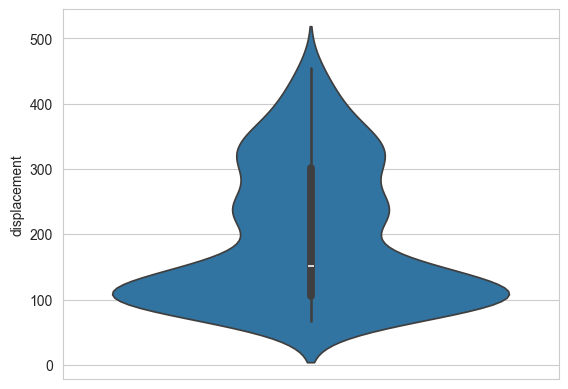

In [8]:
sns.violinplot(cars.displacement);

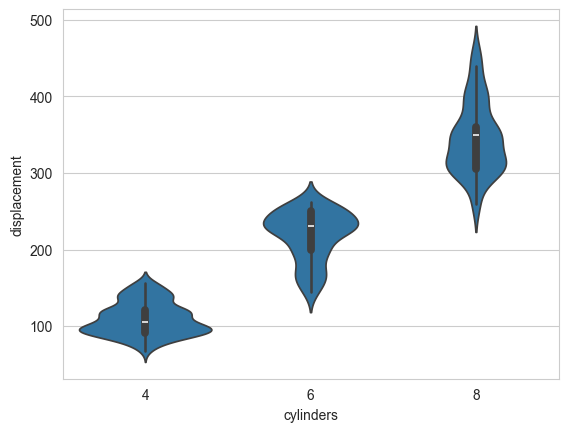

In [9]:
sns.violinplot(y =cars.displacement,x=cars.cylinders);


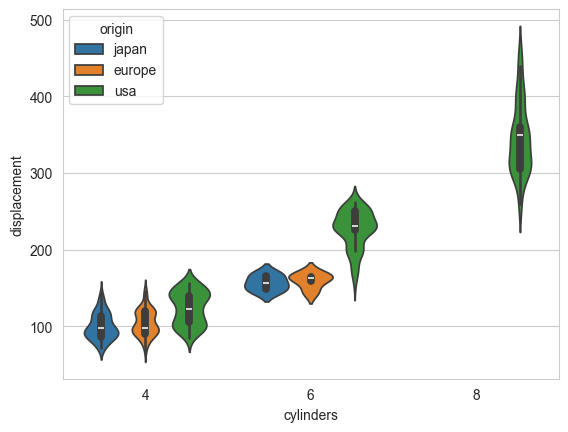

In [10]:
sns.violinplot(x='cylinders',y='displacement',hue ='origin',data=cars);

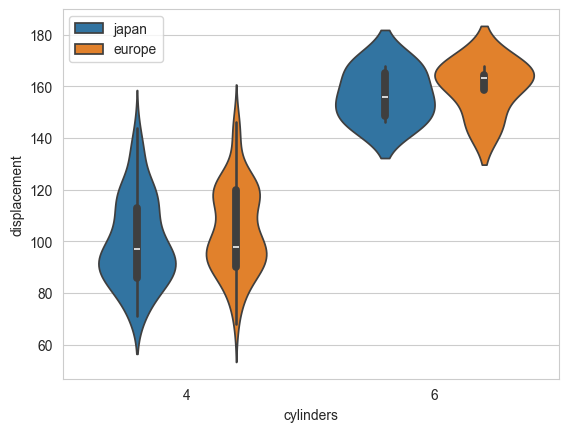

In [11]:
sns.violinplot(x='cylinders',y='displacement',hue ='origin',data= cars[cars.origin.isin(['japan','europe'])])

plt.legend(loc=2);

# split

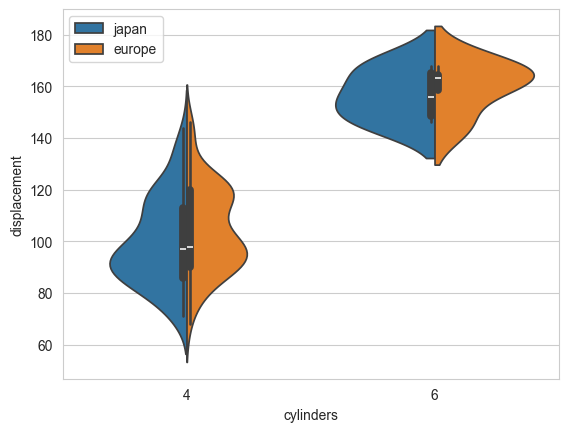

In [12]:
sns.violinplot(x='cylinders',y='displacement',hue ='origin', split=True,data= cars[cars.origin.isin(['japan','europe'])])

plt.legend(loc=2);

# inner

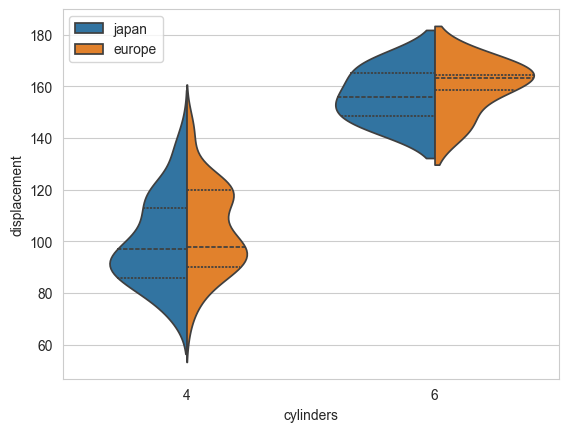

In [13]:
sns.violinplot(x='cylinders',y='displacement',hue ='origin', inner ='quartiles', split = True,data= cars[cars.origin.isin(['japan','europe'])])

plt.legend(loc=2);

# scale

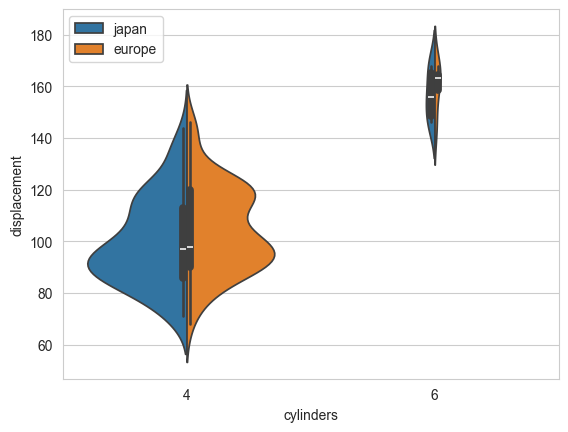

In [14]:
sns.violinplot(x='cylinders',y='displacement',hue ='origin',common_norm=True,split = True,density_norm='count',data= cars[cars.origin.isin(['japan','europe'])])

plt.legend(loc=2);

In [15]:
(
    cars[cars.origin.isin(['japan','europe'])]
    .groupby('cylinders')
    .origin
    .value_counts()
)

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: count, dtype: int64

#### order,linewidth and many other properties are same in boxplot and violin plot

# kde options 

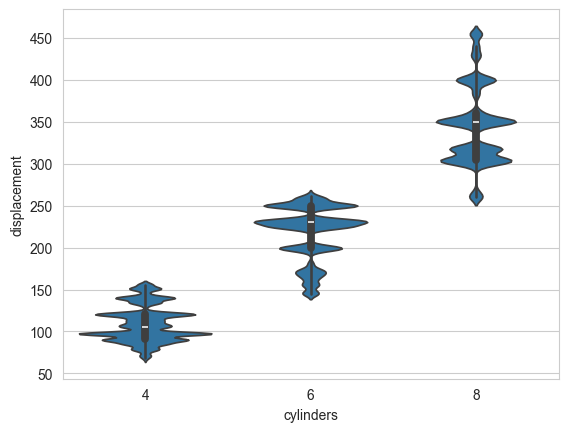

In [16]:
sns.violinplot(x='cylinders',y='displacement',data=cars,bw_method = 0.1);

# Seaborn: scatterplot

In [17]:
diamonds = sns.load_dataset('diamonds')
diamonds.shape

(53940, 10)

In [18]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
diamonds = diamonds[
            diamonds.cut.isin(['Premium','Good']) &
            diamonds.color.isin(['D','F','J'])
].sample(n=100,random_state=22)
diamonds.shape

(100, 10)

In [20]:
sns.set_style('dark')

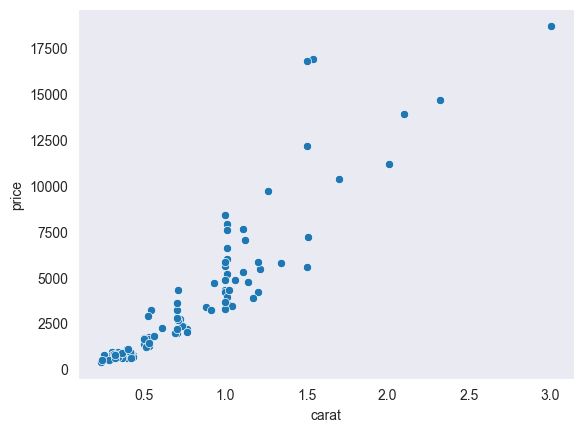

In [21]:
sns.scatterplot(x='carat',y='price',data=diamonds);

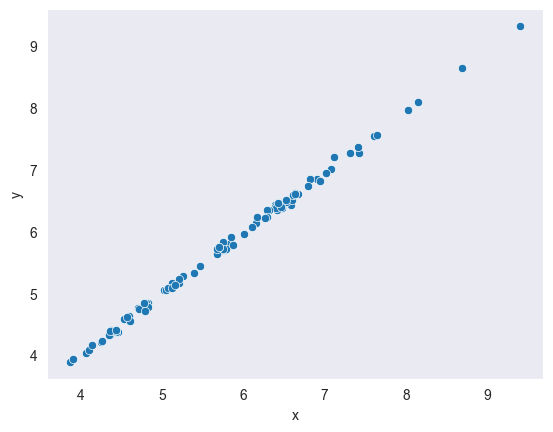

In [22]:
sns.scatterplot(x='x',y='y',data=diamonds);

# Sementic vairiables

In [23]:
sns.set_style('darkgrid')

## hue

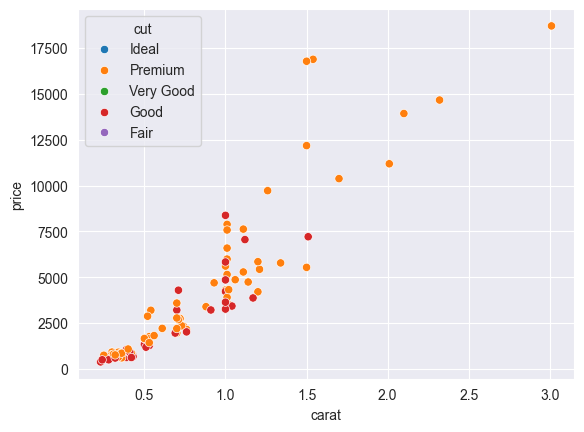

In [24]:
sns.scatterplot(x='carat',y='price',hue ='cut',data=diamonds);

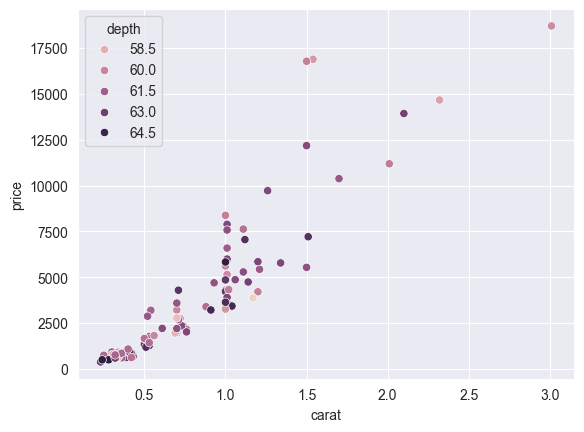

In [25]:
sns.scatterplot(x='carat',y='price',hue ='depth',data=diamonds);

# Style

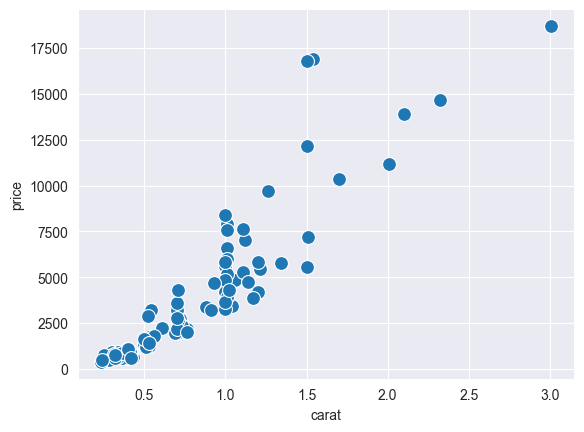

In [26]:
sns.scatterplot(x='carat',y='price',s= 100,data=diamonds);


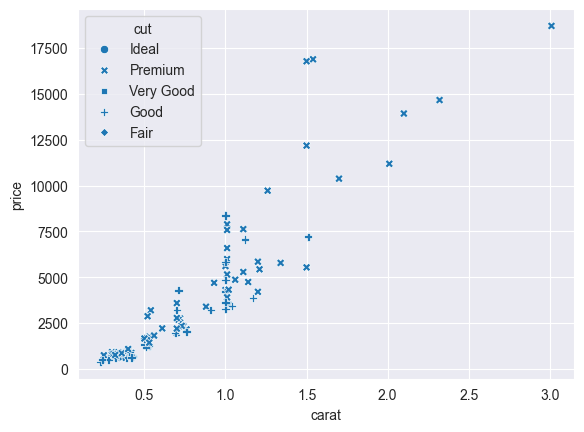

In [27]:
sns.scatterplot(x='carat',y='price',style ='cut',data=diamonds);


## size

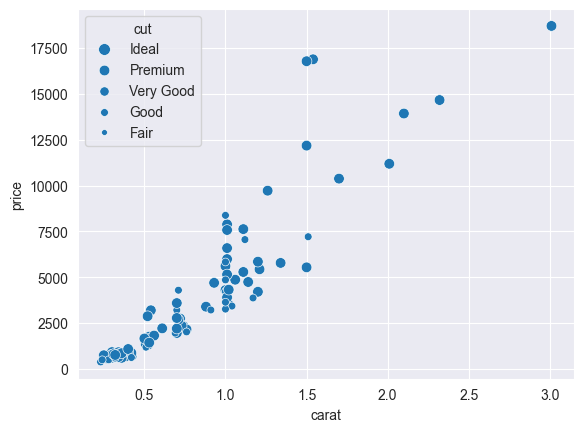

In [28]:
sns.scatterplot(x='carat',y='price',size ='cut',data=diamonds);


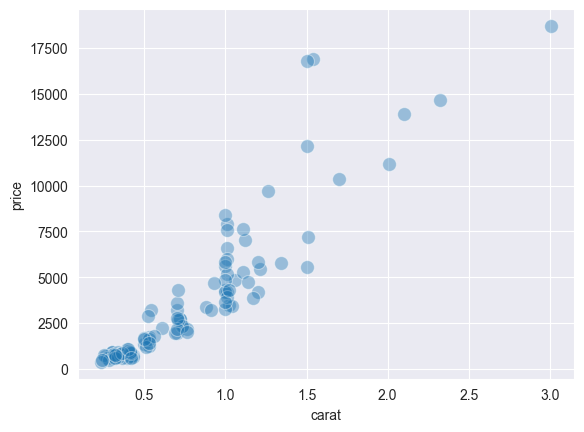

In [29]:
sns.scatterplot(x='carat',y='price',s=100,alpha = 0.4,data=diamonds);


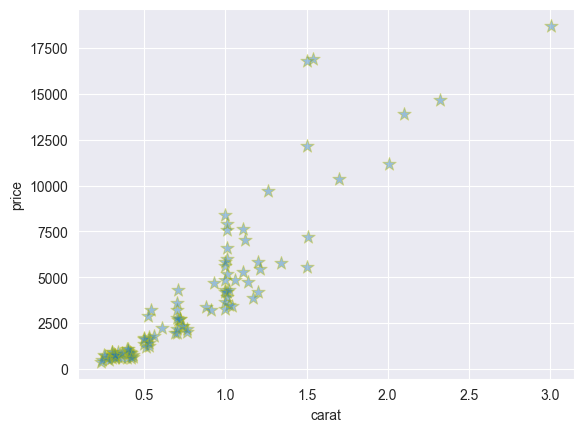

In [30]:
sns.scatterplot(x='carat',y='price',s=100,alpha = 0.4, marker = '*',edgecolor='y',data=diamonds);


# Seaborn heatmap

In [31]:
import pandas as pd
import numpy as np

In [32]:
cars = sns.load_dataset('mpg')

In [33]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [34]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: count, dtype: int64

In [35]:
origin_cyl=(cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)

<Axes: xlabel='cylinders', ylabel='origin'>

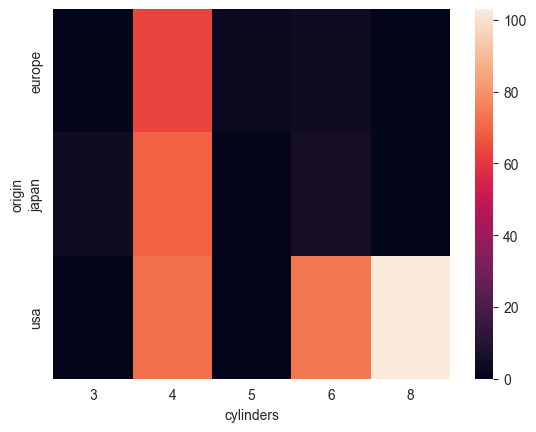

In [36]:
sns.heatmap(origin_cyl)

In [37]:
testarray = np.array([[1,2],[3,4]])

<Axes: >

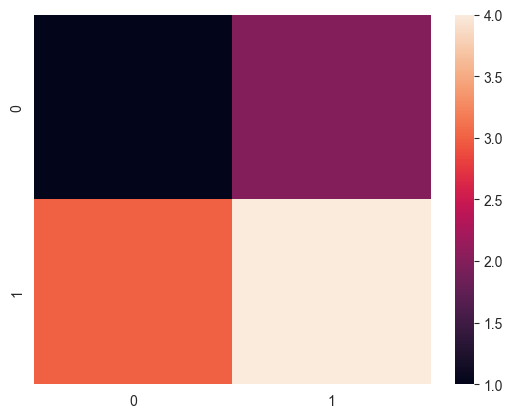

In [38]:
sns.heatmap(testarray)

In [39]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


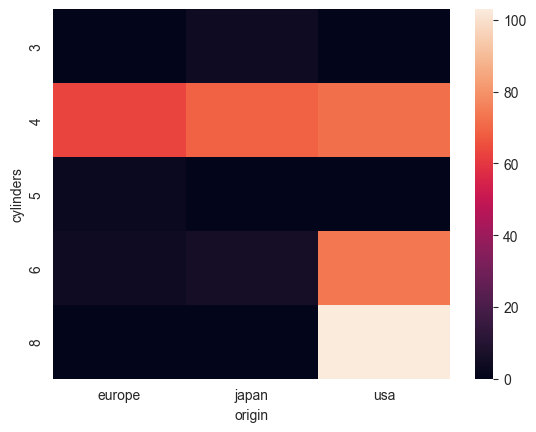

In [40]:
sns.heatmap(origin_cyl.T);

In [41]:
cars = sns.load_dataset('mpg')

<Axes: xlabel='cylinders', ylabel='origin'>

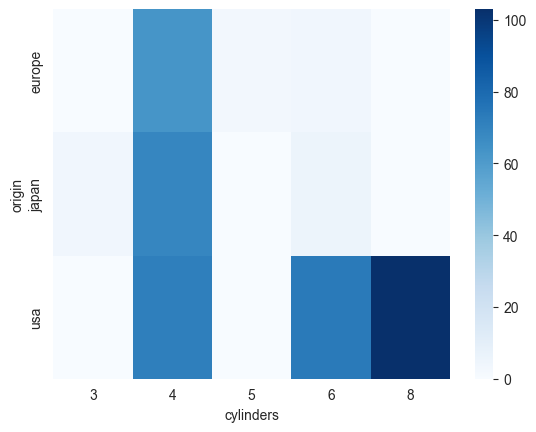

In [42]:
sns.heatmap(origin_cyl,cmap='Blues')

<Axes: xlabel='cylinders', ylabel='origin'>

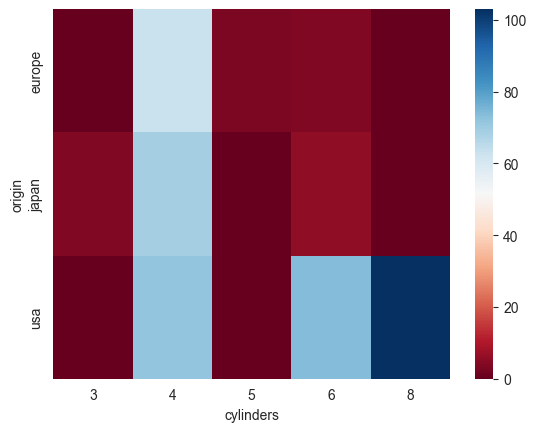

In [43]:
sns.heatmap(origin_cyl,cmap='RdBu')

# Annotations

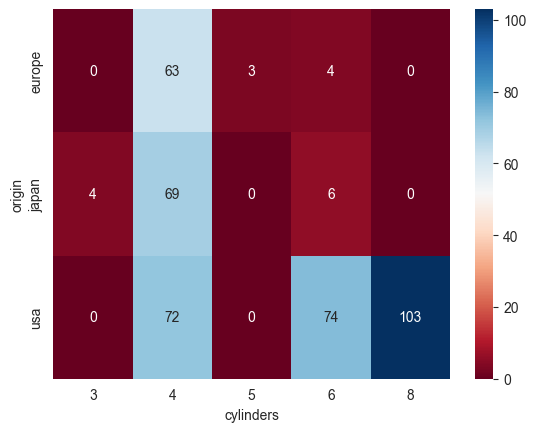

In [44]:
sns.heatmap(origin_cyl,cmap='RdBu',annot = True,fmt = ".0f");


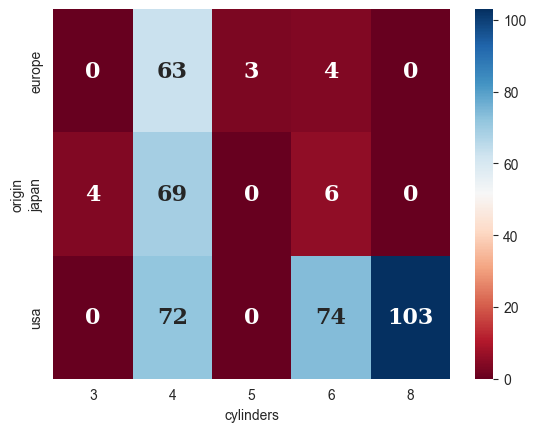

In [45]:
sns.heatmap(origin_cyl,
            cmap='RdBu',
            annot = True,
            fmt = ".0f",
            annot_kws={
                'fontsize': 16,
                'fontweight':'bold',
                'fontfamily':'serif',
                # 'color':'black'
            }
           );

# Advanced styling in the seaborn heatmap

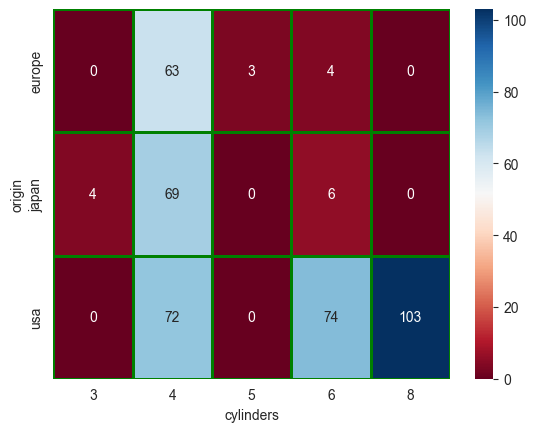

In [46]:
sns.heatmap(origin_cyl,cmap='RdBu',annot = True,fmt = ".0f",linewidth=1,linecolor='g');

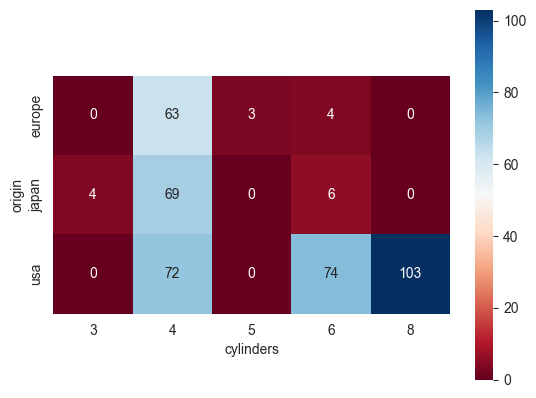

In [47]:
sns.heatmap(origin_cyl,cmap='RdBu',annot = True,fmt = ".0f",square = True);

# Pairplot

In [48]:
tips = sns.load_dataset('tips')

In [49]:
# tips.head()
tips.shape

(244, 7)

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
sns.set_style('darkgrid')

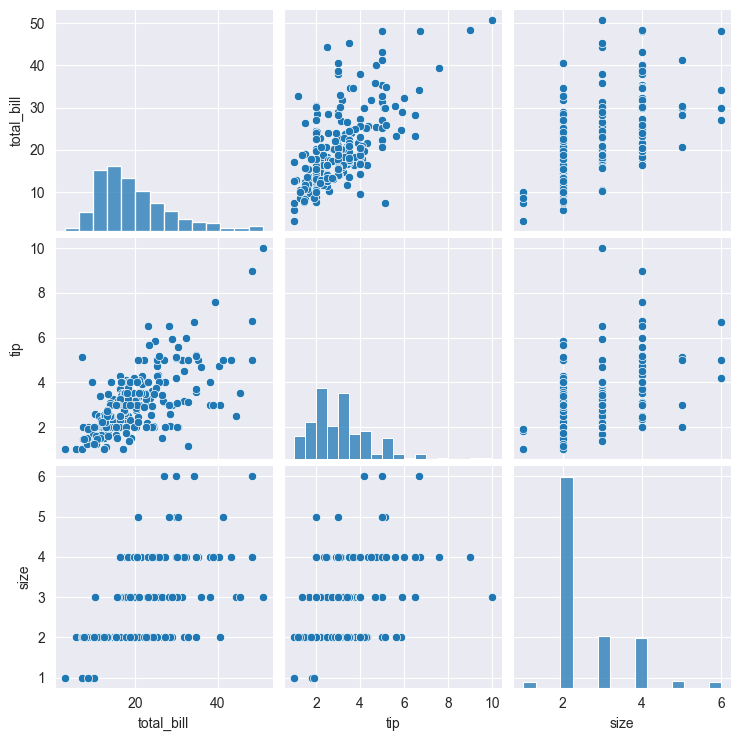

In [52]:
sns.pairplot(tips);

In [53]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

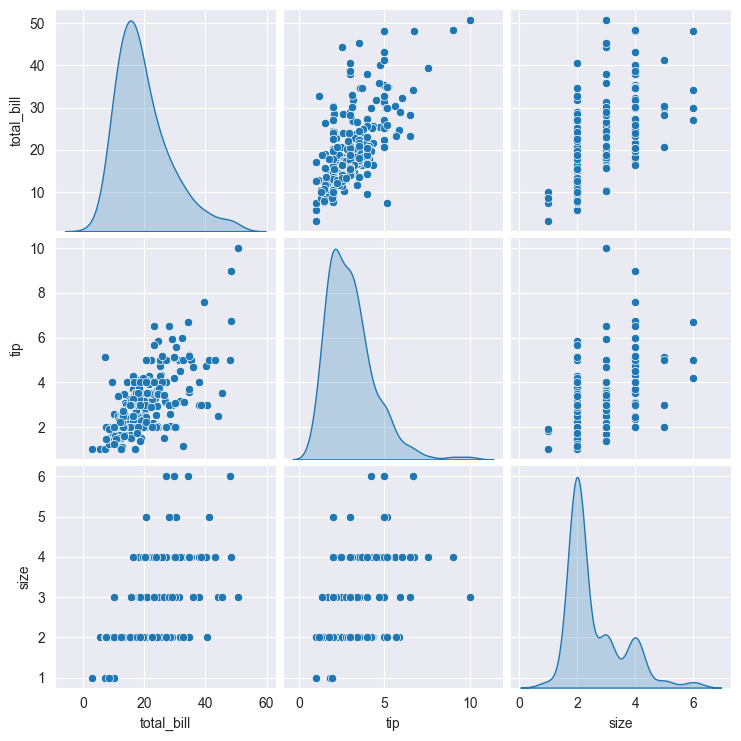

In [54]:
sns.pairplot(tips,diag_kind='kde');

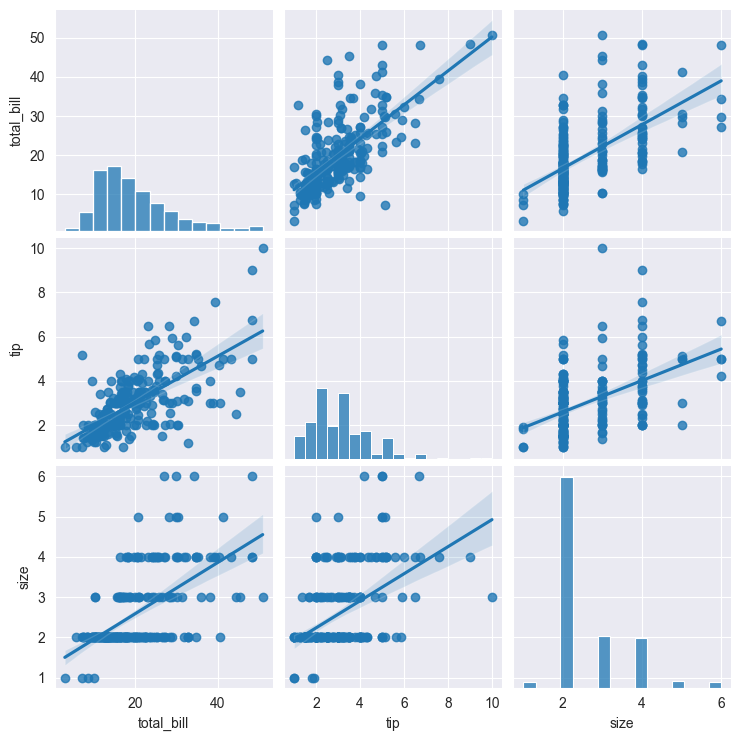

In [55]:
sns.pairplot(tips,kind='reg');


In [56]:
tips['weekend'] = tips.day.isin(['Sat','Sun'])

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


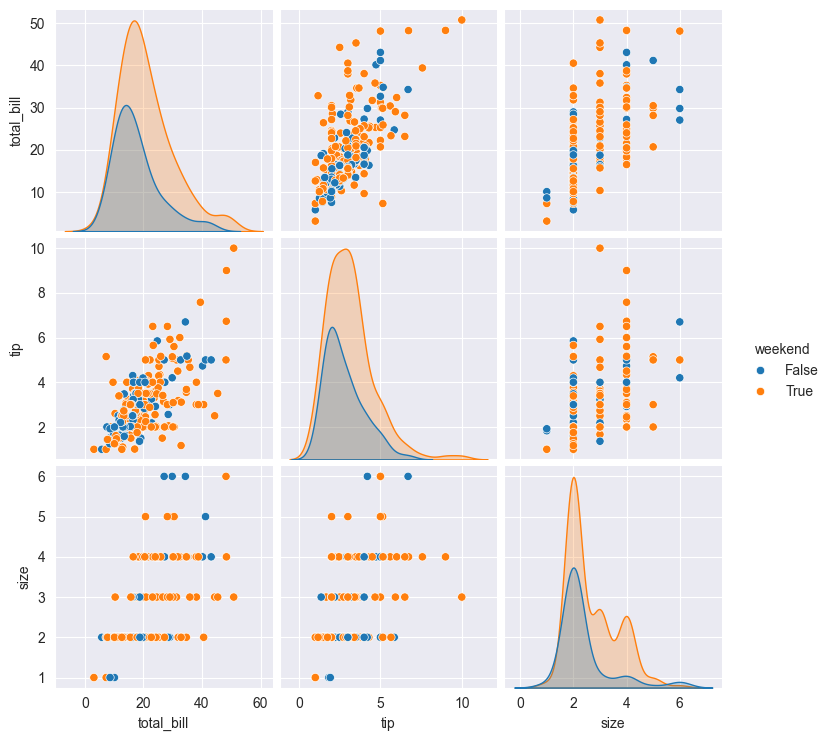

In [58]:
sns.pairplot(tips,hue='weekend')

we can specify the no. of the variables and many other things

# height ,ascpect

In [59]:
from ipywidgets import interactive

In [60]:
def size_widget(height=2.5,aspect=1):
    sns.pairplot(tips,height=height,aspect=aspect)

In [61]:
interactive(size_widget,height=(1,3.5,0.5),aspect = (0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

# palette

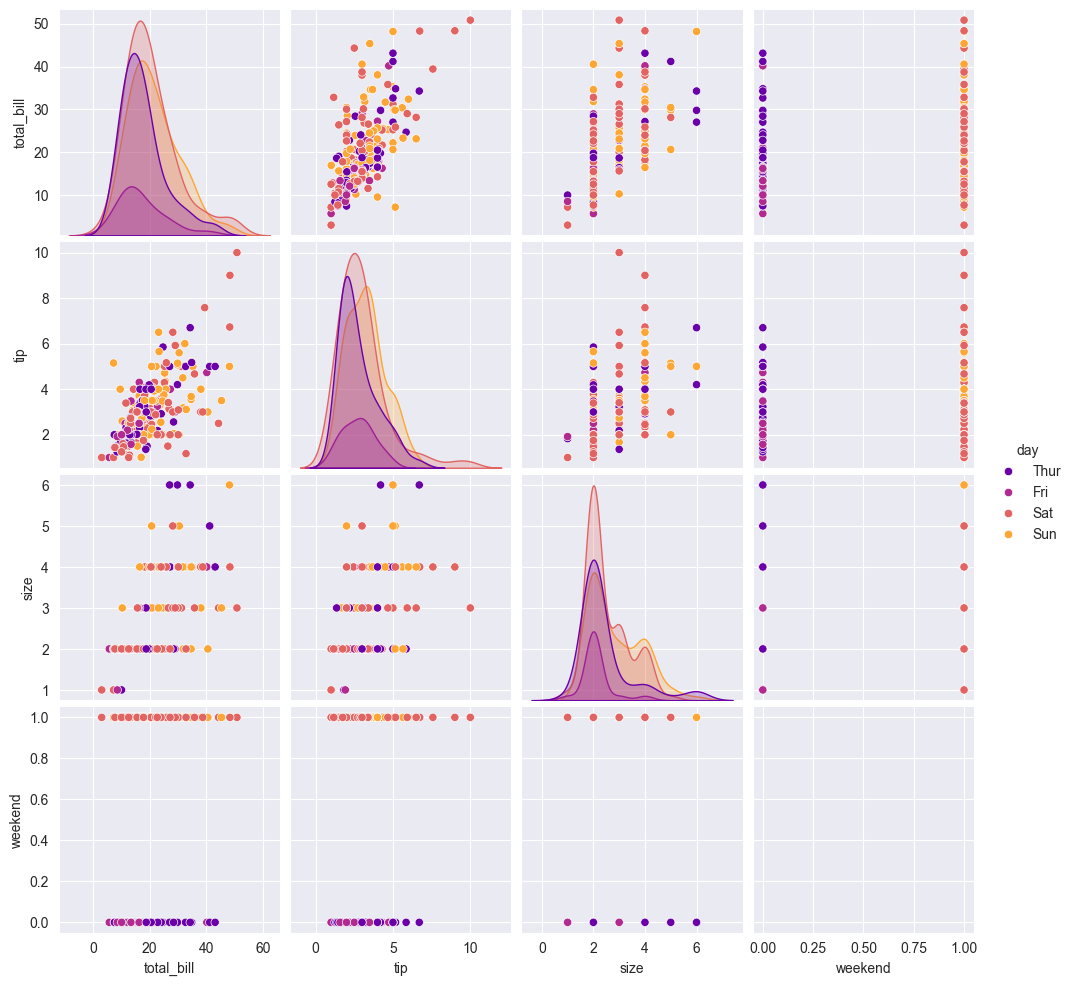

In [62]:
sns.pairplot(tips,hue='day', palette='plasma');

## diag_kws, plot_kws

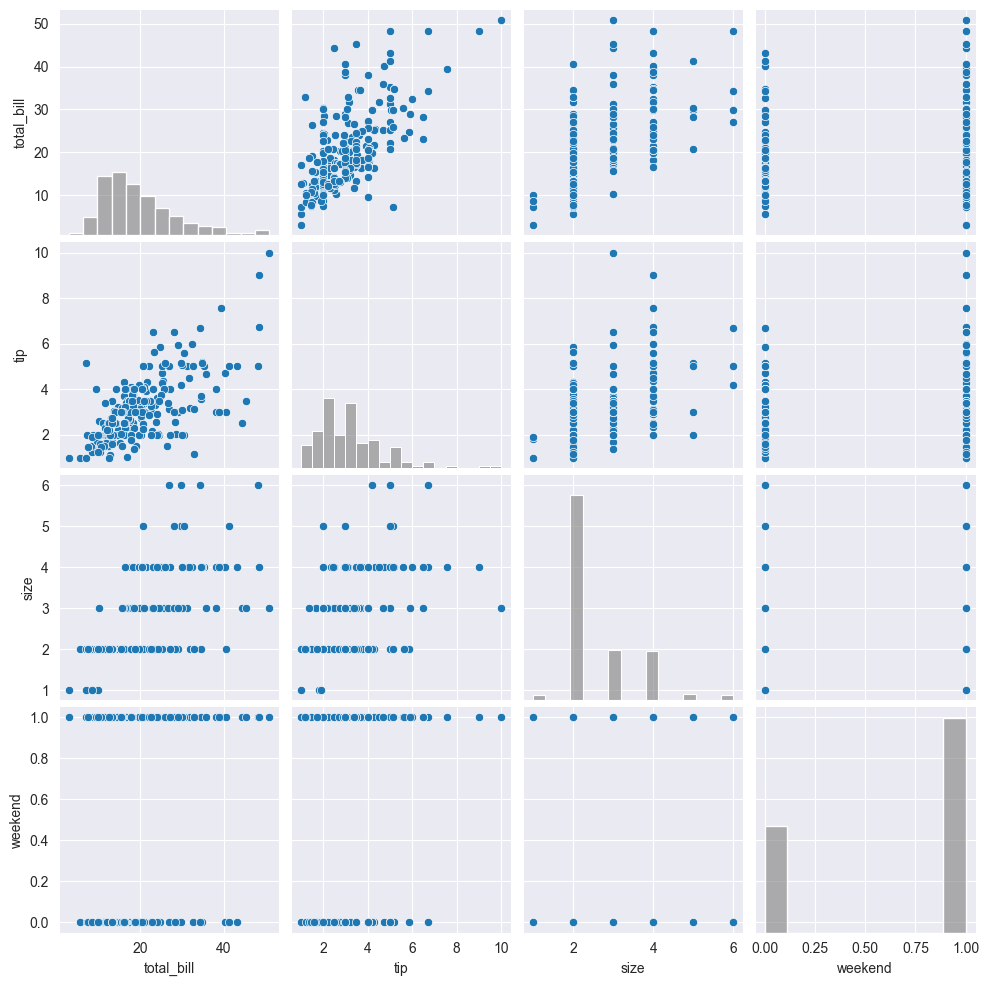

In [63]:
sns.pairplot(tips,diag_kws={'color':'gray','alpha':0.6});

# Bar plot

In [64]:
penguins = sns.load_dataset('penguins')

In [65]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [66]:
penguins.shape

(344, 7)

In [67]:
sns.set_style('darkgrid')

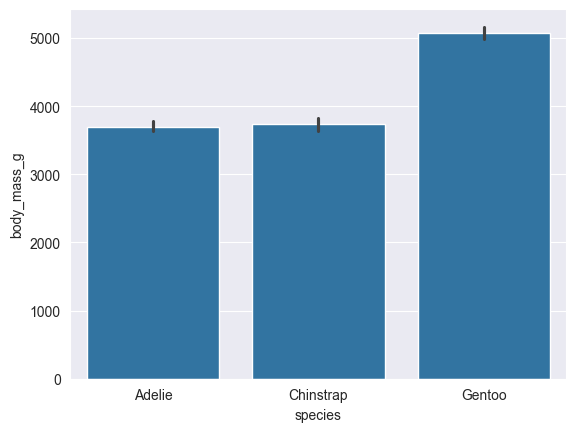

In [68]:
sns.barplot(x='species',y = 'body_mass_g',data = penguins);

In [70]:
penguins.groupby('species').body_mass_g.mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

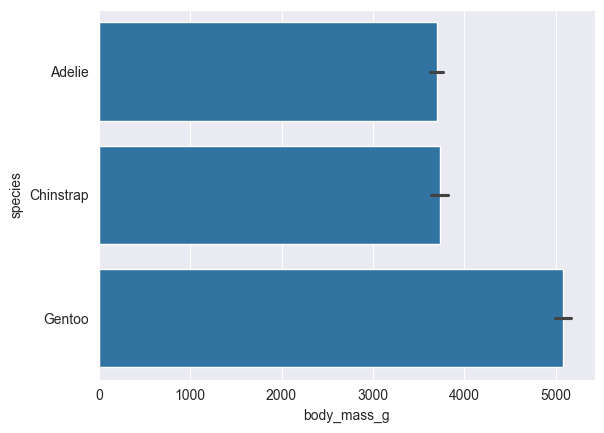

In [71]:
sns.barplot(x='body_mass_g',y='species',data = penguins);

## Confidence Interval(ci)

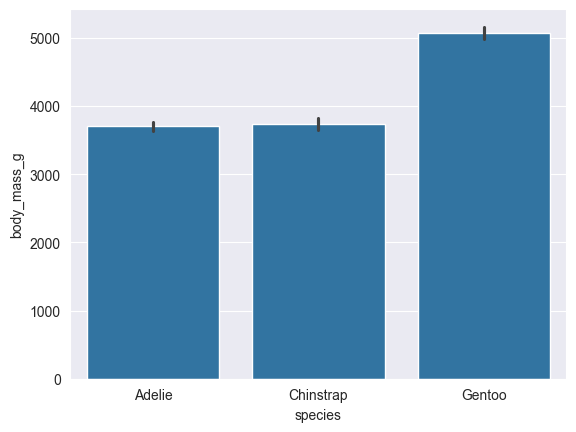

In [73]:
sns.barplot(x='species',y = 'body_mass_g',data = penguins);
errobar=('ci',68)

# Estimator

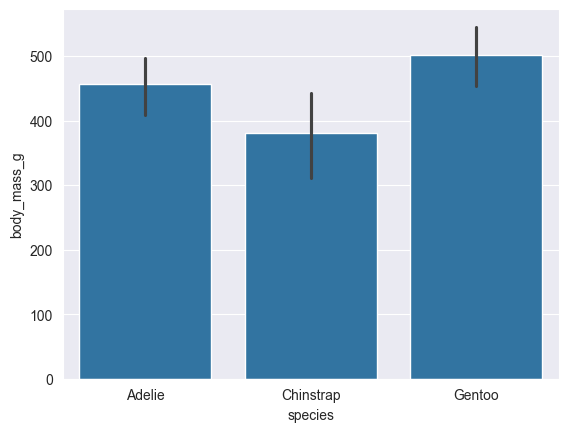

In [74]:
sns.barplot(x='species',y = 'body_mass_g',data = penguins,
           estimator=np.std);


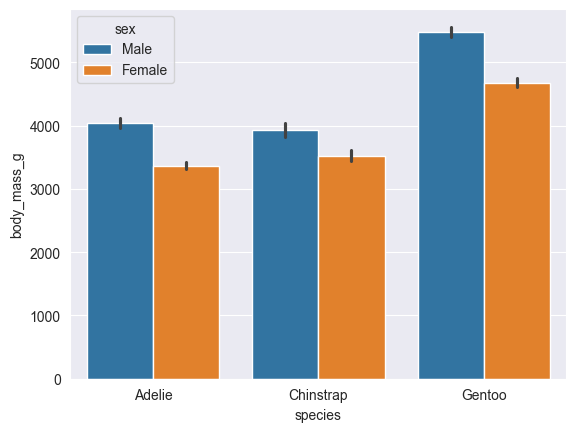

In [76]:
sns.barplot(x='species',y = 'body_mass_g',data = penguins,
           hue='sex');


C:\Users\hp\AppData\Local\Temp\ipykernel_3832\2343927198.py:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'darkslateblue'}` instead.

  sns.barplot(x='species',y = 'body_mass_g',data = penguins,
C:\Users\hp\AppData\Local\Temp\ipykernel_3832\2343927198.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 8}` instead.

  sns.barplot(x='species',y = 'body_mass_g',data = penguins,


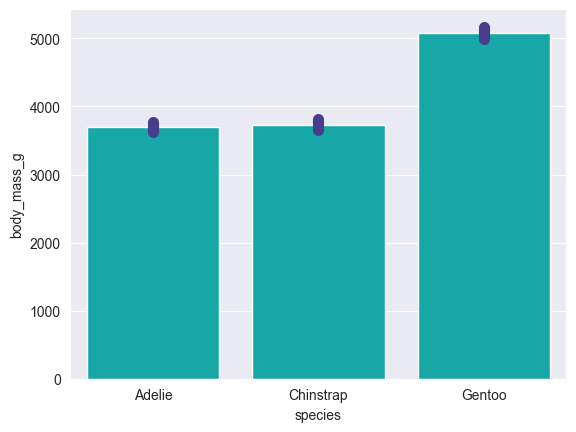

In [77]:
sns.barplot(x='species',y = 'body_mass_g',data = penguins,
           color='c',
           errcolor='darkslateblue',
           errwidth=8);


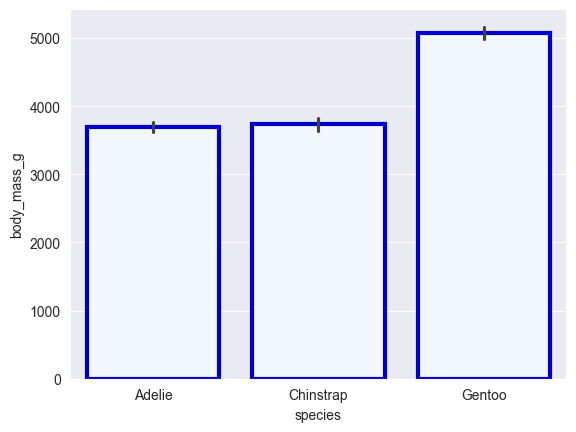

In [78]:
sns.barplot(x='species',y = 'body_mass_g',data = penguins,
           color='aliceblue',
           edgecolor='mediumblue',
           lw=3);


# Seaborn: Countplot

In [79]:
diamonds = sns.load_dataset('diamonds')

In [80]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [81]:
sns.set_style('darkgrid')

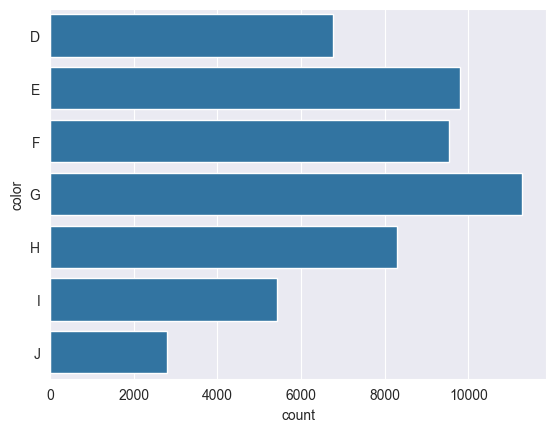

In [84]:
sns.countplot(y='color',data = diamonds);

In [85]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [87]:
diamonds.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [88]:
diamonds.cut.cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

In [89]:
diamonds.color.value_counts().index

CategoricalIndex(['G', 'E', 'F', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category', name='color')

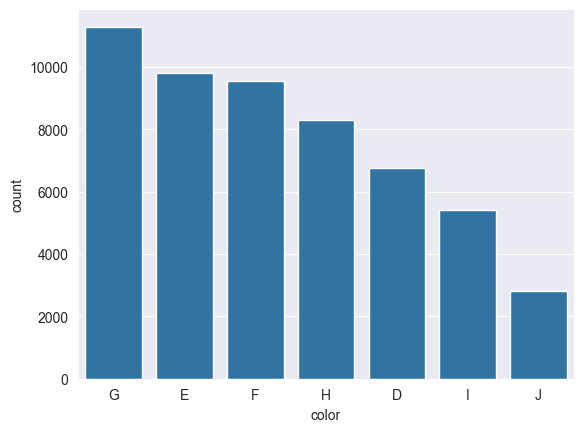

In [92]:
sns.countplot(x='color',data=diamonds,order=diamonds.color.value_counts().index);

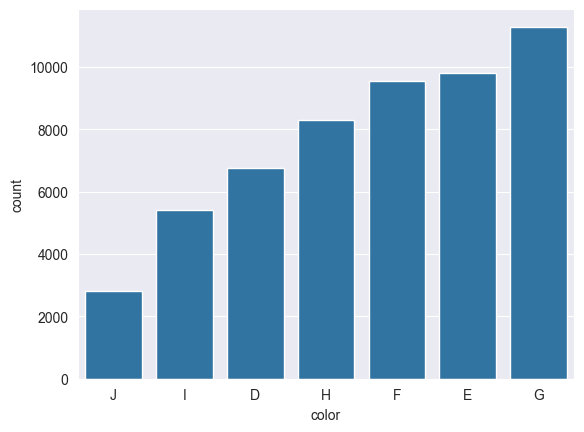

In [93]:
sns.countplot(x='color',data=diamonds,order=diamonds.color.value_counts().index[::-1]);


# hue, hue_order

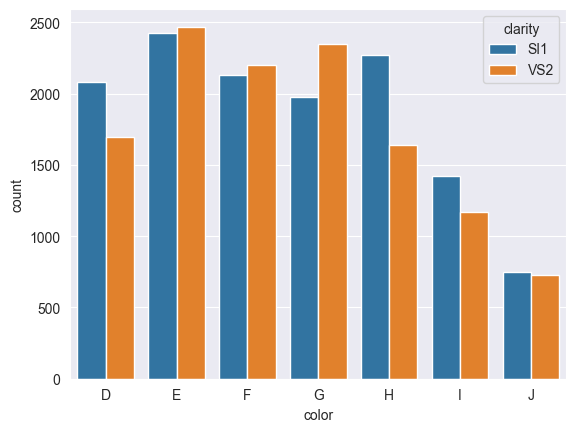

In [96]:
sns.countplot(x='color',data=diamonds,hue='clarity',hue_order=['SI1','VS2']);

# Styling

### color and palette

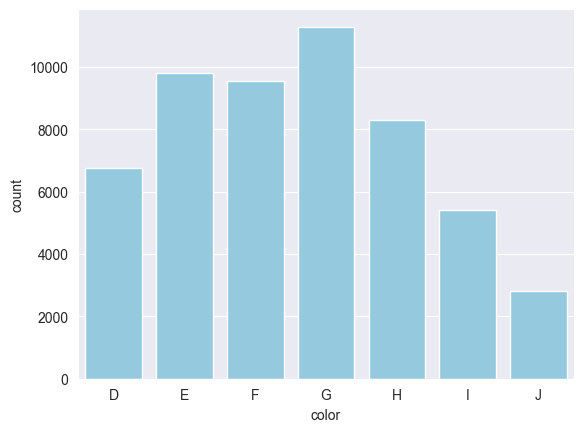

In [98]:
sns.countplot(x='color',data=diamonds,color='skyblue');

C:\Users\hp\AppData\Local\Temp\ipykernel_3832\1986867405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color',data=diamonds,palette='twilight');


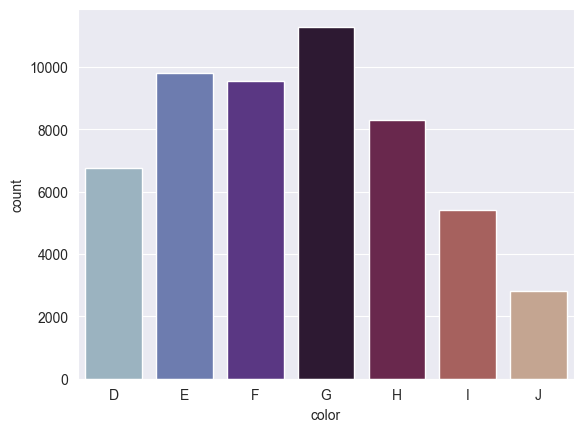

In [99]:
sns.countplot(x='color',data=diamonds,palette='twilight');

## Other Matplotlib properties

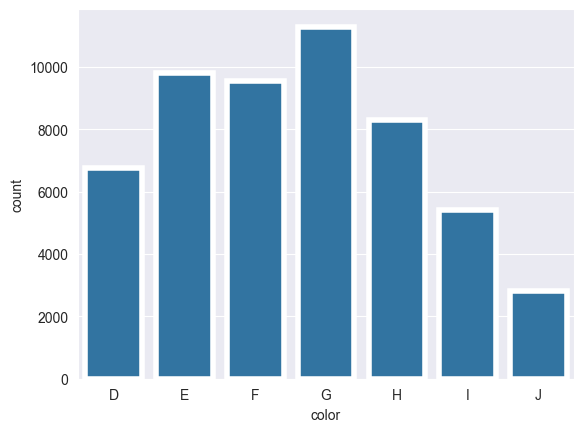

In [100]:
sns.countplot(x='color',data=diamonds,lw=4);